# Customer Experience Dataset - Veri Analizi Projesi

## ✨ Bölüm 1 : Giriş ve Veri seti Tanıtımı

Müşteri Deneyimi Veri Seti, bir dijital platformda müşterilerin davranışlarını ve memnuniyet düzeylerini simüle eden yapay bir veri setidir. Müşteri demografisi, platformla etkileşim düzeyi, ürün inceleme-satın alma davranışları ve memnuniyet skorları gibi değişkenleri içermektedir.

Bu projede, müşteri memnuniyeti ve elde tutulma (retention) durumunu etkileyen faktörleri keşfetmek amacıyla Keşifsel Veri Analizi (EDA) yapılacaktır.

Analiz kapsamında:

- Temel istatistiksel özetler hesaplanacak  
- Eksik ve aykırı değerler belirlenecek  
- Sayısal ve kategorik değişkenler uygun grafiklerle görselleştirilecektir.

Veri seti, toplam **1.000 gözlem** ve **14 sütun** içermektedir.

### 📦 Veri Seti Değişkenleri

#### Demografik Özellikler:

**Customer_ID**: Müşteri kimliği (benzersiz ID)

**Age**: Müşteri yaşı

**Gender**: Cinsiyet (Male, Female)

**Location**: Yaşanılan konum (Urban, Suburban gibi)

#### Etkileşim Verileri:

**Num_Interactions**: Müşterinin platformla etkileşim sayısı

**Feedback_Score**: Geri bildirim puanı (1–5 arası)

**Products_Purchased**: Satın alınan ürün sayısı

**Products_Viewed**: Görüntülenen ürün sayısı

#### Davranışsal Veriler:
**Time_Spent_on_Site**: Sitede geçirilen süre (dakika cinsinden)

#### Hedef (Sonuç) Değişkenleri:
**Satisfaction_Score**: Müşteri memnuniyet skoru (1–10 arası)

**Retention_Status**: Müşterinin elde tutulup tutulmadığı (Retained = tutuldu, Churned = kaybedildi)

🔸 Bu sütun, **tahmin edilecek hedef değişken (target)** olarak değerlendirilecektir.

#### Sayısal Kodlanmış (Encoded) Sütunlar:

**Gender_Encoded**: Cinsiyetin sayısal karşılığı (Male = 1, Female = 0 gibi)

**Location_Encoded**: Lokasyonun sayısal karşılığı

**Retention_Status_Encoded**: Elde tutulma durumunun kodlanmış hali (Retained = 1, Churned = 0)

In [10]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Uyarı gizleme
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('customer_experience_data.csv')

In [4]:
df.head(5)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [7]:
df.shape

(1000, 14)

## 📈 Bölüm 2: İstatistiksel Özet

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

**Gözlemler**:

Sütunların **3 tanesi kategorik (object)**, **1 tanesi ondalıklı (float64)**, geri kalanlar **tam sayı (int64)** türündedir.

In [9]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


**count**:	Gözlem sayısını (hepsi 1000)

**mean**:	Ortalama

**std**:	Standart sapma (verinin yayılımı)

**min / max**:	Minimum / maksimum değerler

**25%, 50%, 75%**:	Çeyreklikler (Q1, Medyan, Q3)

**Gözlemler**:

- Age değişkeni: Ortalama yaş ~44, minimum 18, maksimum 69.

- Num_Interactions: Ortalama 7.5 etkileşim; bazı kullanıcılar sadece 1 kere, bazıları 14 defa etkileşim kurmuş.

- Time_Spent_on_Site: Ortalama ~32 dakika, ancak 5 ile 60 dakika arasında büyük bir değişim var.

- Satisfaction_Score: 1 ile 10 arasında, ortalama 5.5 civarında, bu memnuniyetin ortalama düzeyde olduğunu gösteriyor.

- Retention_Status_Encoded: Bu değişken binary (0 veya 1), ve ortalaması 0.694 → müşterilerin yaklaşık %69’u platformda kalmış (retained).

## 🧼 Bölüm 3: Eksik Değer Analizi

Veri setinde eksik değer olup olmadığını kontrol etmek ve varsa bunları uygun şekilde ele almak gerekir.

In [15]:
missing_counts = df.isnull().sum()
missing_counts

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


**Gözlemler**:

Eksik veri seti bulunmamaktadır.

## 🚨 Bölüm 4: Aykırı Değer (Outlier) Analizi

Aykırı değerler, veri setinde istatistiksel dağılımdan önemli ölçüde sapmış gözlemleri ifade eder. Bu değerler, analiz sonuçlarını bozabileceği veya model tahminlerini yanıltabileceği için dikkatle incelenmelidir.

### 🔍 Uygulanan Yöntemler
**Görsel Yöntem**:

Her bir sayısal değişken için boxplot (kutu grafiği) çizilerek olası aykırı değerler gözlemlenmiştir. Boxplot’ta kutunun dışında kalan noktalar potansiyel aykırılar olarak kabul edilir.

**İstatistiksel Yöntem (IQR - Çeyrekler Arası Aralık)**:

Her değişken için 1. çeyrek (Q1) ve 3. çeyrek (Q3) hesaplanmış, ardından IQR = Q3 − Q1 bulunmuştur.

Alt sınır = Q1 − 1.5 × IQR

Üst sınır = Q3 + 1.5 × IQR
Bu aralık dışında kalan tüm gözlemler aykırı olarak tanımlanmıştır.

**🧾 Analiz Edilen Değişkenler**:

- Age

- Num_Interactions

- Feedback_Score

- Time_Spent_on_Site

- Products_Viewed

- Products_Purchased

- Satisfaction_Score

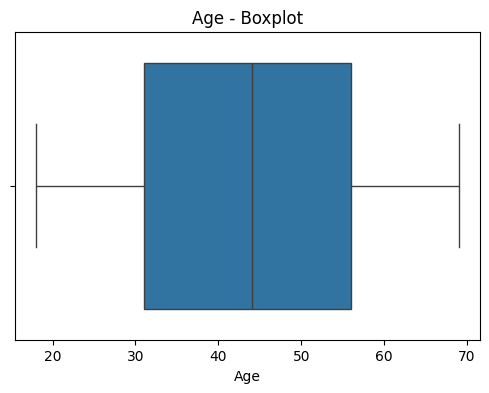

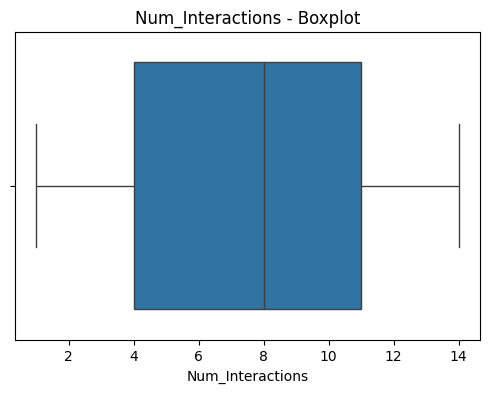

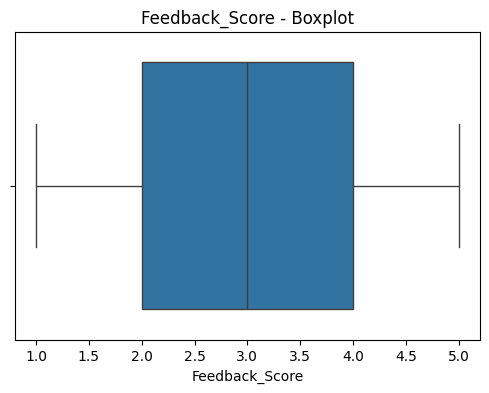

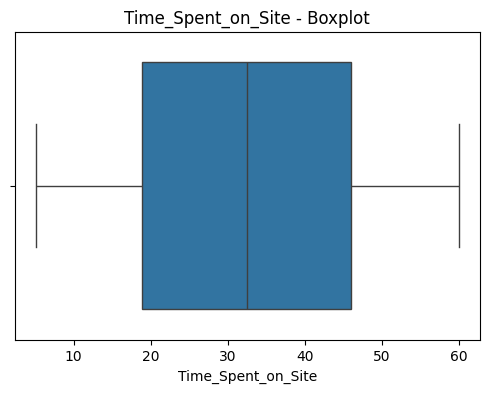

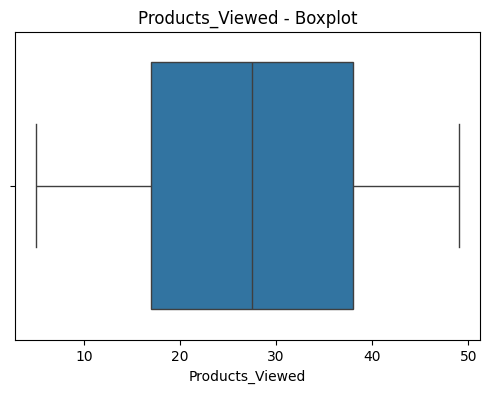

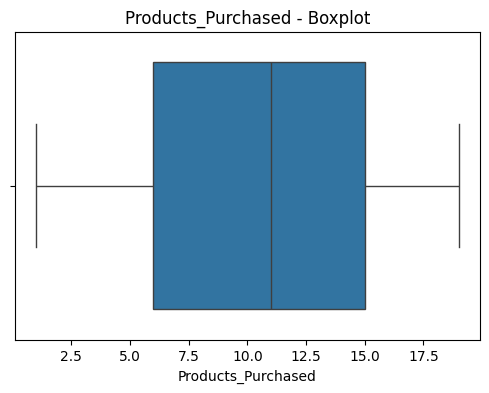

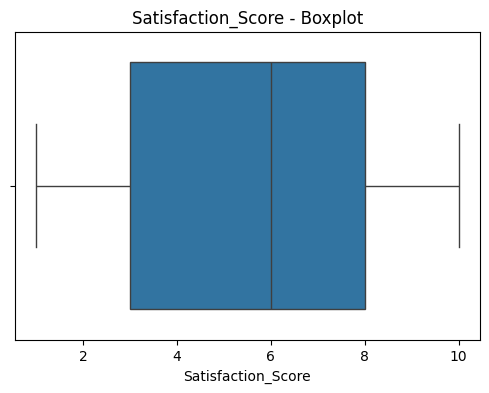

In [18]:
# İncelenecek sayısal sütunlar (aykırı değer açısından anlamlı olanlar)
outlier_cols = ['Age', 'Num_Interactions', 'Feedback_Score','Time_Spent_on_Site', 'Products_Viewed', 'Products_Purchased','Satisfaction_Score']

# Her sütun için boxplot çizimi
for col in outlier_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.xlabel(col)
    plt.show()

In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Aykırı değer sayısını her değişken için hesapla
for col in outlier_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} sütununda aykırı değer sayısı: {len(outliers)}")

Age sütununda aykırı değer sayısı: 0
Num_Interactions sütununda aykırı değer sayısı: 0
Feedback_Score sütununda aykırı değer sayısı: 0
Time_Spent_on_Site sütununda aykırı değer sayısı: 0
Products_Viewed sütununda aykırı değer sayısı: 0
Products_Purchased sütununda aykırı değer sayısı: 0
Satisfaction_Score sütununda aykırı değer sayısı: 0


**Gözlem**:

Veri setindeki tüm sayısal değişkenlerde IQR yöntemi ile anlamlı bir aykırı değer tespit edilmemiştir. Ayrıca boxplot görsellerinde de aşırı uçta değerler gözlemlenmemiştir. Bu durum:

Veri setinin istatistiksel olarak homojen bir dağılıma sahip olduğunu,

Veri toplama sürecinin tutarlı ve temiz gerçekleştiğini,

Aykırı değer ön işleme adımlarına gerek olmadığını göstermektedir.

Bu da ileride yapılacak istatistiksel testlerin ve makine öğrenimi modellerinin daha güvenilir sonuçlar vermesini sağlayacaktır

## 📊 Bölüm 5: Görselleştirme ve Keşifsel Analiz (EDA)

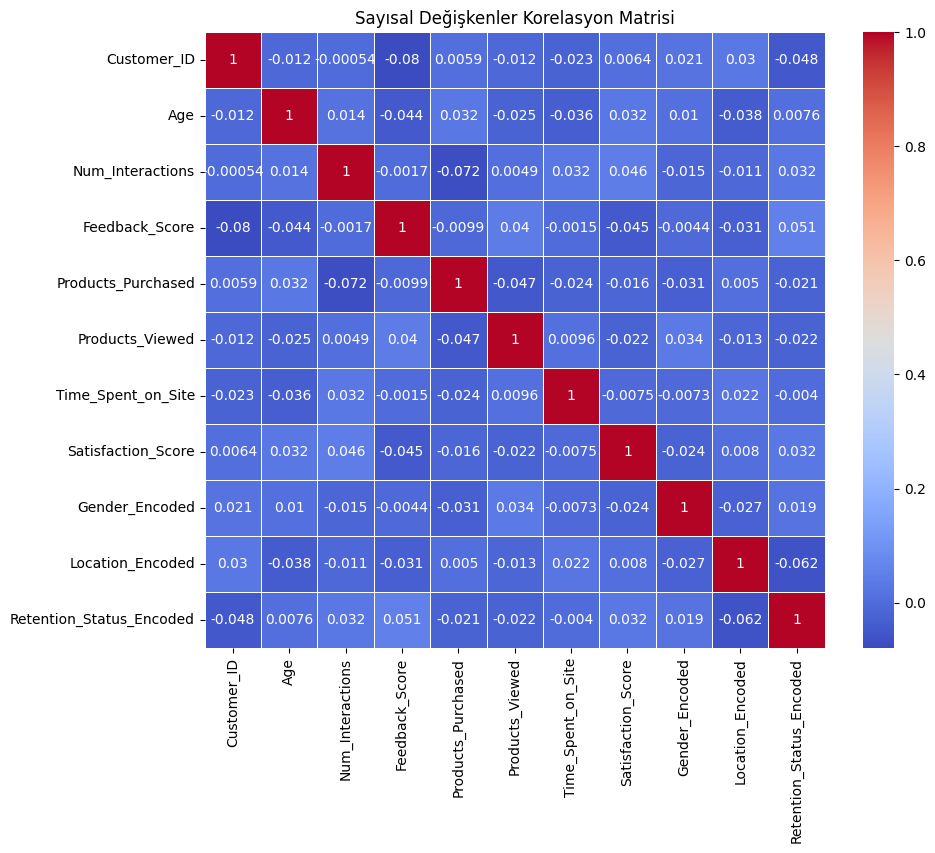

In [20]:
# Sayısal sütunları filtrele
numeric_df = df.select_dtypes(include=np.number)

# Korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


Korelasyon değerleri genel olarak düşük. Bu da değişkenler arasında güçlü lineer ilişkilerin olmadığını gösteriyor.

Retention_Status_Encoded (müşteri elde tutma durumu) ile diğer değişkenler arasında dikkat çekici bir korelasyon bulunmamakta.

Satisfaction_Score ile: Feedback_Score arasında -0.045 gibi zayıf negatif bir ilişki var. Num_Interactions ile pozitif ama zayıf (0.046) ilişki var.

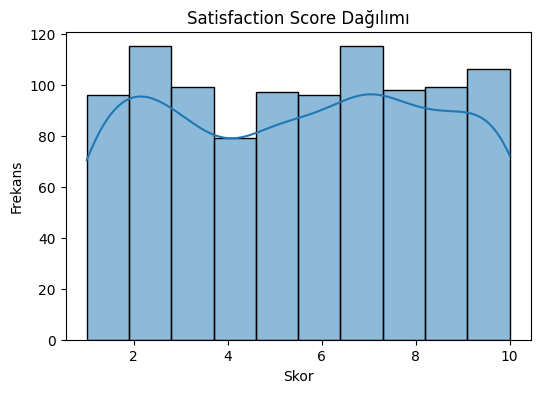

In [21]:
# Memnuniyet skorunun dağılımı
plt.figure(figsize=(6,4))
sns.histplot(df['Satisfaction_Score'], bins=10, kde=True)
plt.title("Satisfaction Score Dağılımı")
plt.xlabel("Skor")
plt.ylabel("Frekans")
plt.show()

Skorlar 1-10 arası dağılmış, ancak her sınıfta müşteri sayısı benzer seviyelerde. Hafif sağa yatık bir dağılım var. Memnuniyet genel olarak dengeli dağılmış. Çok yüksek veya çok düşük skorlar kümelenmemiş. Bu, müşteri kitlesinin çeşitli deneyimler yaşadığını gösterebilir.

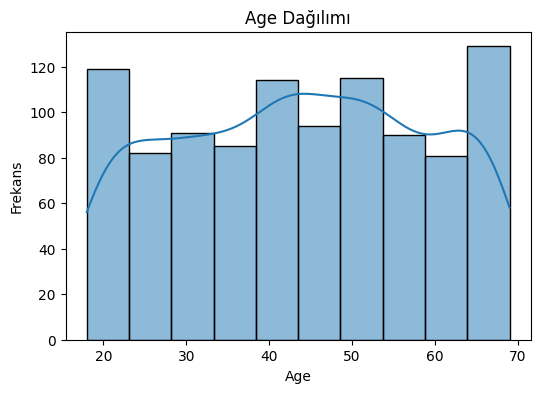

In [25]:
# Age dağılımı
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Dağılımı")
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.show()

Yaşlar da oldukça dengeli dağılmış, özellikle 30-70 yaş arası. Her yaş grubundan müşteriler mevcut. Yaşa göre segmentasyon yapılabilir ama retention ile doğrudan net bir ilişki gözlenmemiş.

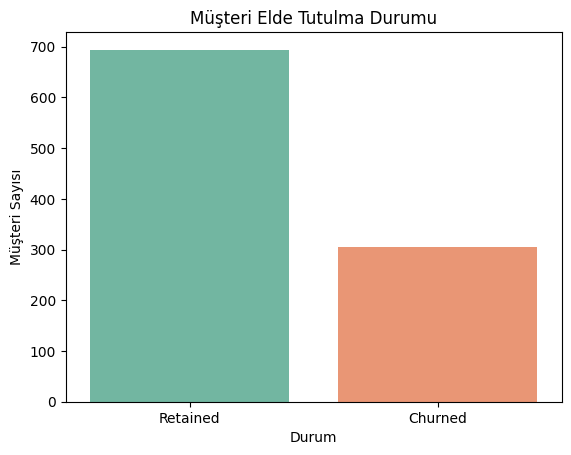

In [22]:
# Retention durumuna göre sayım
sns.countplot(x="Retention_Status", data=df, palette="Set2")
plt.title("Müşteri Elde Tutulma Durumu")
plt.xlabel("Durum")
plt.ylabel("Müşteri Sayısı")
plt.show()


Retained (korunan müşteri) sayısı Churned (ayrılan müşteri) sayısından belirgin şekilde fazla. Genel olarak müşteri sadakati yüksek. Ancak churn olan müşteri kitlesinin nedenlerini incelemek önemli olabilir.

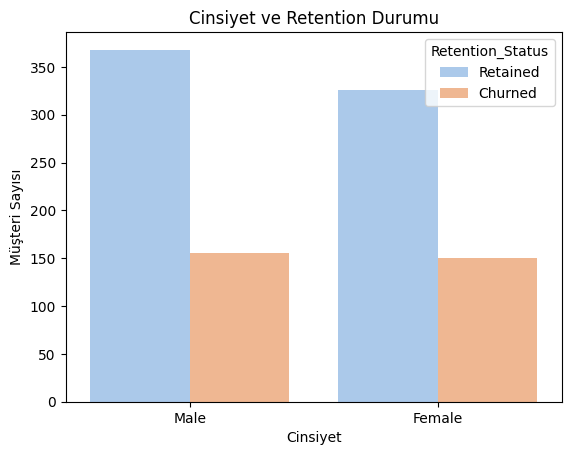

In [23]:
# Cinsiyet ve retention ilişkisi
sns.countplot(x="Gender", hue="Retention_Status", data=df, palette="pastel")
plt.title("Cinsiyet ve Retention Durumu")
plt.xlabel("Cinsiyet")
plt.ylabel("Müşteri Sayısı")
plt.show()


Hem erkek hem kadınlarda "retained" müşteriler daha fazla. Erkeklerde retained sayısı biraz daha fazla. Cinsiyet bazlı retention farkı az. Cinsiyet bu veride belirleyici bir faktör olmayabilir.

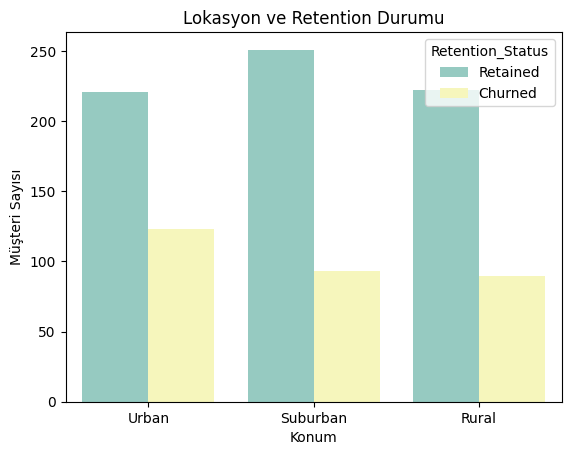

In [24]:
# Lokasyon ve retention ilişkisi
sns.countplot(x="Location", hue="Retention_Status", data=df, palette="Set3")
plt.title("Lokasyon ve Retention Durumu")
plt.xlabel("Konum")
plt.ylabel("Müşteri Sayısı")
plt.show()


Suburban (banliyö) bölgede retention daha yüksek. Urban ve Rural'da churn oranı daha yüksek. Suburban müşteriler daha sadık olabilir. Şirket suburban bölgelere daha iyi hizmet veriyor olabilir ya da bu bölgede müşteri profili daha sadık olabilir.

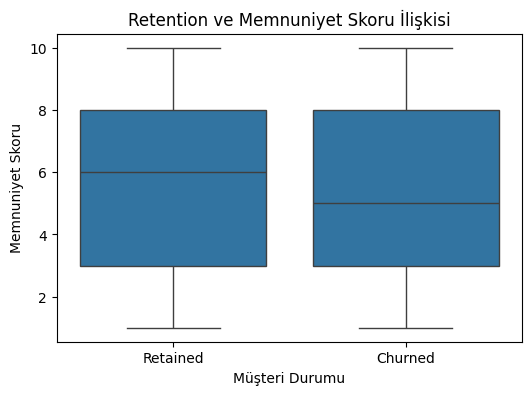

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Retention_Status', y='Satisfaction_Score', data=df)
plt.title("Retention ve Memnuniyet Skoru İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Memnuniyet Skoru")
plt.show()


Medyan memnuniyet skoru:

Retained (elde tutulan) müşterilerde ≈ 6

Churned (kaybedilen) müşterilerde ≈ 5

Her iki grubun skor aralığı da benzer (1 ile 10 arasında).

Retained müşterilerde 3. çeyrek (Q3) değeri daha yüksek, yani bu gruptaki müşterilerin daha büyük kısmı memnuniyet açısından daha yüksek skorlar almış.

Churned grubunda daha fazla düşük memnuniyetli müşteri olduğu göze çarpıyor.

Müşteri elde tutma durumu ile memnuniyet skoru arasında zayıf ama gözle görülür bir ilişki var. Memnuniyeti yüksek müşterilerin retained olma ihtimali daha fazla. Ancak, memnuniyeti düşük olan retained müşteriler ve memnuniyeti yüksek olup churn eden müşteriler de mevcut, bu da retention kararlarının sadece memnuniyet skoruyla belirlenmediğini gösteriyor.